In [24]:
#imports
from __future__ import print_function
import pyart
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from time import time
import os
from netCDF4 import num2date, date2num


In [17]:
fn  = '/Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_233003.vol.h5'
#Since the names in the HDF5 file are non-standard we use file_field_names = True
myradar = pyart.aux_io.read_odim_h5(fn, file_field_names=True) 

In [29]:
#No nyquist in file so take a guess
print(myradar.fields['VRAD']['data'].max(), myradar.fields['VRAD']['data'].min())

26.6 -26.6


In [27]:

myradar.fields['DBZH']['standard_name'] = 'Reflectivity'
myradar.fields['DBZH']['units'] = 'dBZ'
myradar.fields['DBZH']['long_name'] = 'Radar Reflectivity Factor'
myradar.fields['VRAD']['standard_name'] = 'Velocity'
myradar.fields['VRAD']['units'] = 'm/s'
myradar.fields['VRAD']['long_name'] = 'Radial Velocity of Scatterers'

gatefilter = pyart.correct.GateFilter(myradar)
gatefilter.exclude_masked('DBZH')
corr_vel = pyart.correct.dealias_region_based(
    myradar, vel_field='VRAD', keep_original=False, gatefilter = gatefilter, nyquist_vel=26.6)
myradar.add_field('corrected_velocity', corr_vel, True)


{'units': 'degrees_north', 'long_name': 'Latitude', 'standard_name': 'Latitude', 'data': array([-34.01480103])}
{'units': 'degrees_east', 'long_name': 'Longitude', 'standard_name': 'Longitude', 'data': array([ 151.22599792])}
[ 0.5        0.5        0.5       ...,  7.4000001  7.4000001  7.4000001]


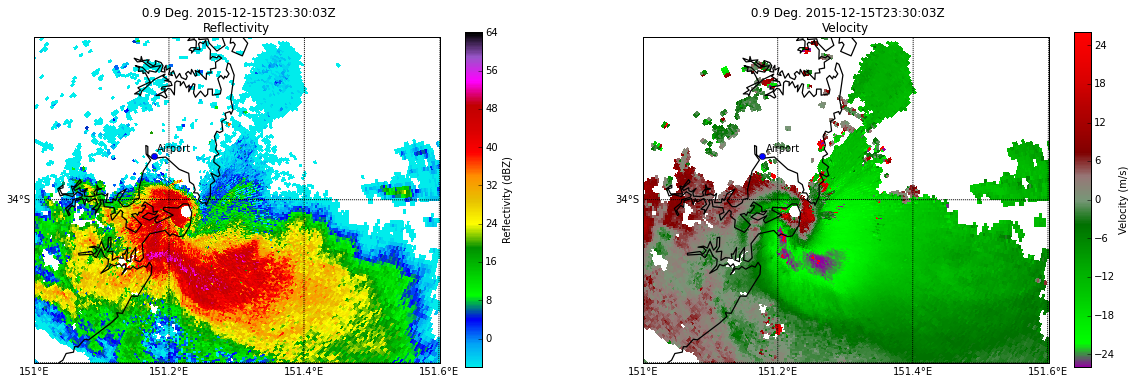

In [28]:
lat_lines = np.arange(-33,-36,-.2)
lon_lines = np.arange(149, 153, .2)
my_display = pyart.graph.RadarMapDisplay(myradar)
tilt = 6
f = plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
my_display.plot_ppi_map('DBZH', tilt, vmin=-6, vmax=64.0, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -33.8, min_lat =-34.2, min_lon = 151.0, max_lon = 151.6,
                       cmap = pyart.graph.cm.NWSRef)
my_display.plot_point( 151.1772, -33.9461,
               label_text = 'Airport', 
               label_offset=[.005,.005], symbol = 'bo' )

ax = plt.gca()
plt.subplot(1,2,2)
my_display.plot_ppi_map('VRAD', tilt, vmin=-26., vmax=26., 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -33.8, min_lat =-34.2, min_lon = 151.0, max_lon = 151.6,
                       cmap = pyart.graph.cm.NWSVel)
my_display.plot_point( 151.1772, -33.9461, 
               label_text = 'Airport', 
               label_offset=[.005,.005], symbol = 'bo' )

ax = plt.gca()


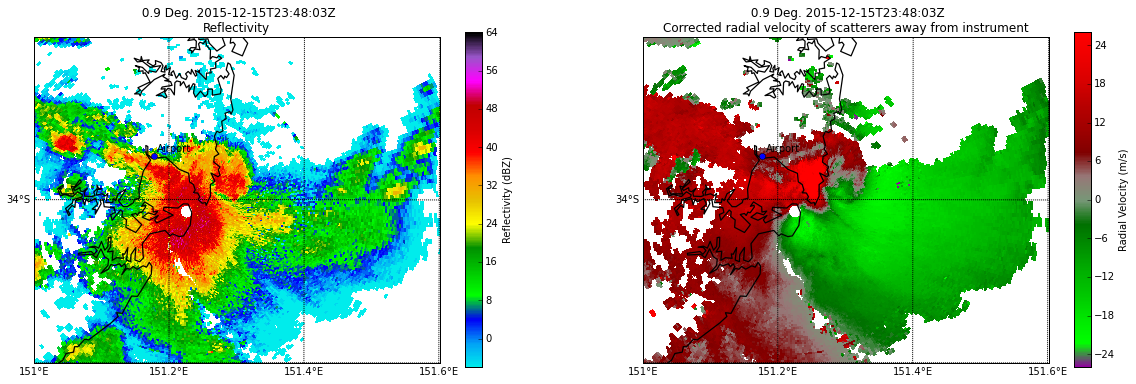

In [27]:
lat_lines = np.arange(-33,-36,-.2)
lon_lines = np.arange(149, 153, .2)
my_display = pyart.graph.RadarMapDisplay(myradar)
tilt = 6
f = plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
my_display.plot_ppi_map('DBZH', tilt, vmin=-6, vmax=64.0, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -33.8, min_lat =-34.2, min_lon = 151.0, max_lon = 151.6,
                       cmap = pyart.graph.cm.NWSRef)
my_display.plot_point( 151.1772, -33.9461,
               label_text = 'Airport', 
               label_offset=[.005,.005], symbol = 'bo' )

ax = plt.gca()
plt.subplot(1,2,2)
my_display.plot_ppi_map('corrected_velocity', tilt, vmin=-26., vmax=26., 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -33.8, min_lat =-34.2, min_lon = 151.0, max_lon = 151.6,
                       cmap = pyart.graph.cm.NWSVel, colorbar_label = 'Radial Velocity (m/s)')
my_display.plot_point( 151.1772, -33.9461, 
               label_text = 'Airport', 
               label_offset=[.005,.005], symbol = 'bo' )

ax = plt.gca()


In [22]:
dirr = '/Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/'
fls = os.listdir(dirr)
fls.sort()

In [26]:

i = 0
for fl in fls:
    try:
        print('doing ', dirr+ fl)
        myradar = pyart.aux_io.read_odim_h5(dirr+ fl, file_field_names=True)
        myradar.fields['DBZH']['standard_name'] = 'Reflectivity'
        myradar.fields['DBZH']['units'] = 'dBZ'
        myradar.fields['DBZH']['long_name'] = 'Radar Reflectivity Factor'
        myradar.fields['VRAD']['standard_name'] = 'Velocity'
        myradar.fields['VRAD']['units'] = 'm/s'
        myradar.fields['VRAD']['long_name'] = 'Radial Velocity of Scatterers'
        gatefilter = pyart.correct.GateFilter(myradar)
        gatefilter.exclude_masked('DBZH')
        corr_vel = pyart.correct.dealias_region_based(
            myradar, vel_field='VRAD', keep_original=False, gatefilter = gatefilter, nyquist_vel=26.600002)
        myradar.add_field('corrected_velocity', corr_vel, True)
        
        lat_lines = np.arange(-33,-36,-.2)
        lon_lines = np.arange(149, 153, .2)
        my_display = pyart.graph.RadarMapDisplay(myradar)
        tilt = 6
        f = plt.figure(figsize=[20,6])
        plt.subplot(1,2,1)
        my_display.plot_ppi_map('DBZH', tilt, vmin=-6, vmax=64.0, 
                                lat_lines = lat_lines, lon_lines = lon_lines,
                                max_lat = -33.8, min_lat =-34.2, min_lon = 151.0, max_lon = 151.6,
                               cmap = pyart.graph.cm.NWSRef, resolution = 'h')
        ax = plt.gca()
        plt.subplot(1,2,2)
        my_display.plot_ppi_map('corrected_velocity', tilt, vmin=-32., vmax=32., 
                                lat_lines = lat_lines, lon_lines = lon_lines,
                                max_lat = -33.8, min_lat =-34.2, min_lon = 151.0, max_lon = 151.6,
                               cmap = pyart.graph.cm.NWSVel, colorbar_label = 'Radial Velocity (m/s)',
                               resolution = 'h')
        ax = plt.gca()
        plt.savefig('/Users/scollis/temp/ftorn_%02d.png' %i, dpi=100)
        plt.close()
        i = i +1
    except:
        pass


doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_230002.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_230603.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_231203.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_231803.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_232403.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_233003.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_233602.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_234203.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_234803.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_235408.vol.h5


In [25]:

i = 0
for fl in fls:
    try:
        print('doing ', dirr+ fl)
        myradar = pyart.aux_io.read_odim_h5(dirr+ fl, file_field_names=True)
        myradar.fields['DBZH']['standard_name'] = 'Reflectivity'
        myradar.fields['DBZH']['units'] = 'dBZ'
        myradar.fields['DBZH']['long_name'] = 'Radar Reflectivity Factor'
        myradar.fields['VRAD']['standard_name'] = 'Velocity'
        myradar.fields['VRAD']['units'] = 'm/s'
        myradar.fields['VRAD']['long_name'] = 'Radial Velocity of Scatterers'
        gatefilter = pyart.correct.GateFilter(myradar)
        gatefilter.exclude_masked('DBZH')
        corr_vel = pyart.correct.dealias_region_based(
            myradar, vel_field='VRAD', keep_original=False, gatefilter = gatefilter, nyquist_vel=26.600002)
        myradar.add_field('corrected_velocity', corr_vel, True)
        
        lat_lines = np.arange(-33,-36,-0.05)
        lon_lines = np.arange(149, 153, .1)
        my_display = pyart.graph.RadarMapDisplay(myradar)
        tilt = 6
        f = plt.figure(figsize=[20,6])
        plt.subplot(1,2,1)
        my_display.plot_ppi_map('DBZH', tilt, vmin=-6, vmax=64.0, 
                                lat_lines = lat_lines, lon_lines = lon_lines,
                                max_lat = -34., min_lat =-34.15, min_lon = 151.1, max_lon = 151.3,
                               cmap = pyart.graph.cm.NWSRef, resolution = 'h')
        ax = plt.gca()
        plt.subplot(1,2,2)
        my_display.plot_ppi_map('corrected_velocity', tilt, vmin=-32., vmax=32., 
                                lat_lines = lat_lines, lon_lines = lon_lines,
                                max_lat = -34.0, min_lat =-34.15, min_lon = 151.1, max_lon = 151.3,
                               cmap = pyart.graph.cm.NWSVel, colorbar_label = 'Radial Velocity (m/s)',
                               resolution = 'h')
        ax = plt.gca()
        plt.savefig('/Users/scollis/temp/torn_zoom_%02d.png' %i, dpi=100)
        plt.close()
        i = i +1
    except:
        pass


doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_230002.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_230603.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_231203.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_231803.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_232403.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_233003.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_233602.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_234203.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_234803.vol.h5
doing  /Users/scollis/Downloads/Kurnell_tor_20151215/kurnell/5402_20151215_235408.vol.h5
